In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [23]:
data_import = pd.read_csv('car_evaluation.csv')
data_import.shape
data_import.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [24]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data_import.columns = col_names
data_import.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [25]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [26]:
for i in data_import.columns:
    print(data_import[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [27]:
x = data_import.drop(['class'], axis = 1)
y = data_import['class']

In [28]:
from sklearn import preprocessing


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1381, 6), (346, 6), (1381,), (346,))

In [31]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(x.columns)

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [32]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
438,1,1,1,1,1,1
36,2,1,2,2,2,1
1256,3,2,3,2,1,2
1487,4,3,4,1,3,2
1450,4,3,2,3,2,3


In [33]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
Dtree.fit(x_train, y_train)
pred_tree = Dtree.predict(x_test)
print(y_test[0:5], pred_tree[0:5])

280       acc
307       acc
1648    unacc
1699    vgood
128     unacc
Name: class, dtype: object ['acc' 'acc' 'unacc' 'vgood' 'unacc']


In [34]:
pred_tree_x_train = Dtree.predict(x_train)

In [35]:
from sklearn.metrics import accuracy_score
print('training set accuracy : %.3f'% accuracy_score(y_train, pred_tree_x_train))
print('testing set accuracy : %.3f'% accuracy_score(y_test, pred_tree))


training set accuracy : 0.858
testing set accuracy : 0.867


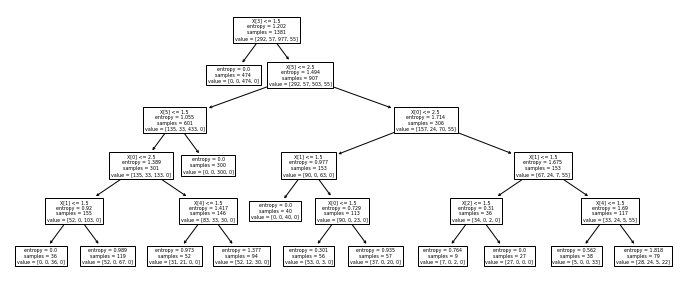

In [36]:
plt.figure(figsize=(12,5))

from sklearn import tree

tree.plot_tree(Dtree);

In [37]:
depth = 7
accuracy = np.zeros((depth-1))

for i in range(2, depth):
    Dtree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    Dtree1.fit(x_train, y_train)
    pred_tree1 = Dtree1.predict(x_test)
    accuracy[i-1] = accuracy_score(y_test, pred_tree1)
    print(accuracy[i-1], i)


0.7630057803468208 2
0.8005780346820809 3
0.8554913294797688 4
0.8670520231213873 5
0.8786127167630058 6


In [39]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(Dtree, y_test, pred_tree)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_tree)
print('Confusion matrix\n', cm)

Confusion matrix
 [[ 76   0  13   3]
 [ 12   0   0   0]
 [ 15   0 217   0]
 [  3   0   0   7]]


<AxesSubplot:>

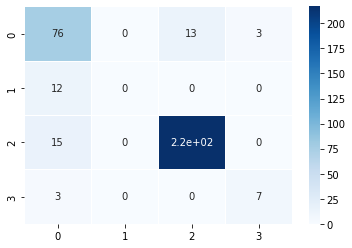

In [41]:
sns.heatmap(cm, annot=True, linewidths=.7, cmap="Blues")

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

         acc       0.72      0.83      0.77        92
        good       0.00      0.00      0.00        12
       unacc       0.94      0.94      0.94       232
       vgood       0.70      0.70      0.70        10

    accuracy                           0.87       346
   macro avg       0.59      0.62      0.60       346
weighted avg       0.84      0.87      0.85       346

